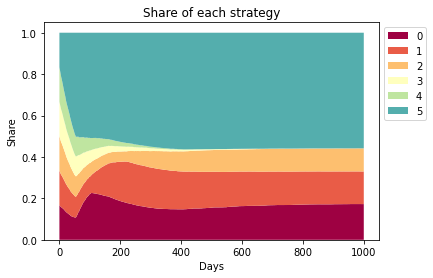

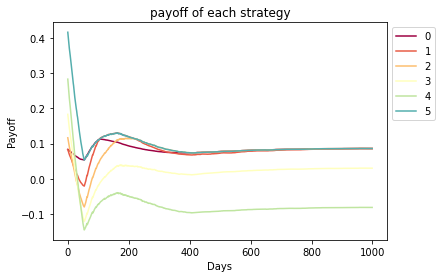

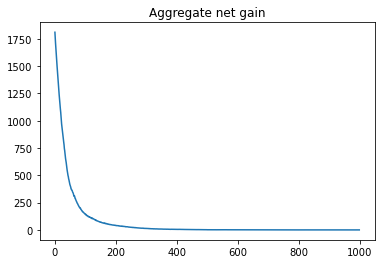

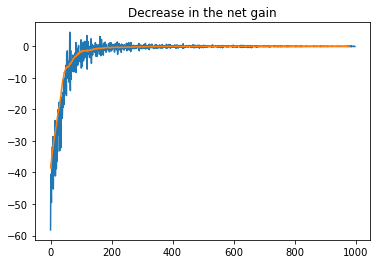

In [5]:
# Topic 7: Gain in Evolutional Dynamics

import math
import random
import matplotlib.pyplot as plt 

"""Assignment"""
student_id = '1513'
numStrtg = int(student_id[3])+5

"""Define the population game"""
# Wars of attrition 
strtgIdxSet = list(range(numStrtg))
strtgLabels = [str(i) for i in strtgIdxSet]
cm = plt.cm.get_cmap('Spectral')
strtgColors = [cm(strtgIdx/numStrtg) for strtgIdx in strtgIdxSet]
PAYMAT = [[0 for oppStrtgIdx in strtgIdxSet] for strtgIdx in strtgIdxSet] 
for ownStrtgIdx in strtgIdxSet:
    for oppStrtgIdx in strtgIdxSet:
        if oppStrtgIdx < ownStrtgIdx:
            PAYMAT[ownStrtgIdx][oppStrtgIdx] = 1 - oppStrtgIdx/(numStrtg-1)
        elif oppStrtgIdx == ownStrtgIdx:
            PAYMAT[ownStrtgIdx][oppStrtgIdx] = 0.5 - ownStrtgIdx/(numStrtg-1)
        else:
            PAYMAT[ownStrtgIdx][oppStrtgIdx] = -ownStrtgIdx/(numStrtg-1)

# aggregating agent's strategies to a strategy distribution
def strtgDist_cal():
    agentsStrtgIdx = [agent.strtgIdx for agent in agentsList]
    return [agentsStrtgIdx.count(strtgIdx)/len(agentsStrtgIdx) for strtgIdx in strtgIdxSet]

# payoff function in the population game
def payVec_fn(strtgDist):
    return [sum([ PAYMAT[ownStrtgIdx][oppStrtgIdx]*strtgDist[oppStrtgIdx] for oppStrtgIdx in strtgIdxSet]) for ownStrtgIdx in strtgIdxSet]

"""Define an Agent class"""
class Agent():
    prRev = 0.01
    # Constructor
    def __init__(self, strtgIdx):
        self.strtgIdx = strtgIdx

    # Generize a rationalizable revision protocol
    def strtgRev(self, payVec): # return the net gain from str revision
        # draws of available strategy set and switching cost
        availStrtgIdxSet = self.drawAvailStrtg()
        switchCost = self.drawSwitchCost()
        # calculate the net gain from strategy revision
        availMaxPay = max([payVec[i] for i in availStrtgIdxSet])
        netGain = availMaxPay - payVec[self.strtgIdx] - switchCost
        # decide whether to switch to the candidate strategy
        if netGain > 0:
            if random.uniform(0,1) < self.prRev:
                availMaxStrtgIdx = [i for i in availStrtgIdxSet if payVec[i] == availMaxPay]
                self.strtgIdx = random.choice(availMaxStrtgIdx)
            # otherwise, keep strategy unchanged
            return netGain
        else:
            return 0

"""A subclass of Agent that follows Tempered BR"""
class AgentLinTempBR(Agent):
    maxSwitchCost = 0.1
    def drawAvailStrtg(self): # all the strategies (except the current one) are always available
        return [ strtgIdx for strtgIdx in strtgIdxSet if strtgIdx != self.strtgIdx ]
    def drawSwitchCost(self): # the switching cost is a random number between 0 and maxSwitchCost
        return random.uniform(0,self.maxSwitchCost)

"""Run the simulation"""
# Parameters
initStrtgDist = [ 1/numStrtg for i in range(numStrtg) ]
initNumAgents = 10000
numDays = 1000
initNumPlayersStrtg = [math.floor(initNumAgents*initStrtgDist[strtgIdx]) for strtgIdx in strtgIdxSet]
# Generate agents 
agentsList = []
for strtgIdx in strtgIdxSet:
    agentsList += [AgentLinTempBR(strtgIdx) for i in range(initNumPlayersStrtg[strtgIdx])]
# Prep lists to store output records
strtgDistHist = []
payVecHist = []
aggNetGainHist = []
# Run the simulation
for day in range(numDays):
    strtgDistCurrent = strtgDist_cal()
    payVecCurrent = payVec_fn(strtgDistCurrent)
    strtgDistHist.append(strtgDistCurrent)
    payVecHist.append(payVecCurrent)
    aggNetGainCurrent = 0
    for agent in agentsList:
        aggNetGainCurrent += agent.strtgRev(payVecCurrent)
    aggNetGainHist.append(aggNetGainCurrent)

"""Plot the results"""
# Shares of strategy
plt.stackplot(list(range(numDays)), [[strtgDistHist[i][strtgIdx] for i in range(numDays)] for strtgIdx in strtgIdxSet], labels=strtgLabels, colors=strtgColors)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Share of each strategy')
plt.xlabel('Days')
plt.ylabel('Share')

# Payoffs
plt.figure()
for strtgIdx in strtgIdxSet:
    plt.plot( [payVecHist[day][strtgIdx] for day in range(numDays)], label=strtgLabels[strtgIdx], color=strtgColors[strtgIdx])
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('payoff of each strategy')
plt.xlabel('Days')
plt.ylabel('Payoff')

# Aggregate net gain
plt.figure()
plt.plot(aggNetGainHist)
plt.title('Aggregate net gain')

# Decrease in the net gain
plt.figure()
decreaseGHist = [aggNetGainHist[day+1] - aggNetGainHist[day] for day in range(numDays-1)]
plt.plot(decreaseGHist)
maLength = 20
plt.plot( [sum([decreaseGHist[day+i] for i in range(maLength)])/maLength for day in range(numDays-1-maLength)])
plt.title('Decrease in the net gain')
plt.show()

In [6]:
"""Print the payVec and distribution of each strategy on the last day"""
for strtg in strtgIdxSet:
    print(f'Strategy: {strtg} \t Payoff: {round(payVecHist[numDays-1][strtg],2)} \t Share: {round(strtgDistHist[numDays-1][strtg],2)}')


Strategy: 0 	 Payoff: 0.09 	 Share: 0.17
Strategy: 1 	 Payoff: 0.09 	 Share: 0.16
Strategy: 2 	 Payoff: 0.09 	 Share: 0.11
Strategy: 3 	 Payoff: 0.03 	 Share: 0.0
Strategy: 4 	 Payoff: -0.08 	 Share: 0.0
Strategy: 5 	 Payoff: 0.09 	 Share: 0.56


Comment: 
- Strategies with the highest payoff will be kept in the population
- In equilibrium, survived strategies yield a payoff of 0.07. Strategy 7 holds the largest share.
- On the other hand, Strategies 4, 5, 6 didn't survive because the payoff is too low (even negative for some).
